<h1>Análise de Microdados Enem para candidatos com condições atípicas</h1>


In [1]:
#Algoritmo Kmeans

import numpy as np
import random
import math as math
import numpy as np
import random as rand
import math as math
from sklearn.metrics import pairwise_distances

def plus_plus(data, k):
    centroids = np.zeros((k, data.shape[1]))
    init = np.random.randint(data.shape[0])
    centroids[0] = data[init]

    for i in range(1, k):
        dist_sq = np.array([min([np.inner(c-x,c-x) for c in centroids]) for x in data])
        probs = dist_sq/dist_sq.sum()
        idx = np.random.choice(data.shape[0], 1, p=probs)
        centroids[i] = data[idx,:]

    return np.array(centroids)


def assign_clusters(data, centroids):
    distances = pairwise_distances(data, centroids, metric='euclidean')
    assignment = np.argmin(distances, axis=1)
    return assignment

def update_centroids(data, assignment, k):
    current_centroids = []
    for i in range(k):
        grouped_by_k = data[assignment==i]
        centroid = np.mean(grouped_by_k, axis=0)
        current_centroids.append(centroid)
    return np.array(current_centroids)

def elbow_sum(data, centroids):
        squareValue = 0
        dist_sq = np.array([min([np.inner(c-x,c-x) for c in centroids]) for x in data])
        return dist_sq.sum()

class Clustering:
    def __init__(self, k = 4, tol=0.001, max_iter= 300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter
        
    def fit(self, data):
        self.centroids = plus_plus(data, self.k)
        for _ in range(self.max_iter):
            self.labels_ = assign_clusters(data, self.centroids)
            old = np.copy(self.centroids)
            self.centroids = update_centroids(data, self.labels_, self.k)

            if (np.linalg.norm(old - np.array(self.centroids))) < self.tol:
                break
        self.elbow = elbow_sum(data, self.centroids)
        return self.centroids, self.labels_
    
    
def f1_score(matrix, k):
    f1 = []
    for i in matrix:
        max = i.max()
        precision = max/i.sum()
        vertical_sum = 0
        index = np.where(i == max)

        for j in range(k):
            vertical_sum += matrix[j][index]
        
        recall = max/vertical_sum
        f1.append(2 * (precision * recall)/(precision + recall))

    f1 = np.array(f1)
    return(f1.mean())

In [10]:
#Import do DataSet
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('/home/joao/Desktop/Faculdade/IC/microdados_enem_2019/DADOS/MICRODADOS_ENEM_2019.csv',nrows = 1000, usecols = ['NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_CN', 'NU_NOTA_MT', 'NU_NOTA_REDACAO'], sep = ';', encoding = 'ISO-8859-1')
df = df[df['NU_NOTA_REDACAO'].notna()]
df = df[df['NU_NOTA_CH'].notna()]
df = df[df['NU_NOTA_LC'].notna()]
df = df[df['NU_NOTA_CN'].notna()]
df = df[df['NU_NOTA_MT'].notna()]
import numpy as np
X = np.array(df)

In [39]:
model = Clustering(3)
model.fit(X, False)

16983505.588684518


(array([[468.94987775, 513.32591687, 528.48826406, 497.53276284,
         597.50611247],
        [555.31438849, 595.52805755, 585.11007194, 641.17697842,
         798.41726619],
        [429.21791045, 447.03955224, 475.31791045, 447.37835821,
         369.10447761]]),
 array([2, 1, 1, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
        2, 0, 0, 2, 1, 2, 0, 2, 2, 0, 0, 2, 2, 2, 0, 0, 1, 2, 0, 1, 0, 0,
        0, 2, 0, 0, 0, 2, 1, 1, 2, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 2, 0,
        2, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 2, 0, 1, 0, 0, 0, 2, 1, 2,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 2, 2, 0, 1, 2, 1, 2, 1,
        2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0,
        0, 2, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 1, 0, 0, 1, 0, 0, 0, 

<h2>Resultado do algoritmo para um clustering tendo 3 centroides:</h2>
    

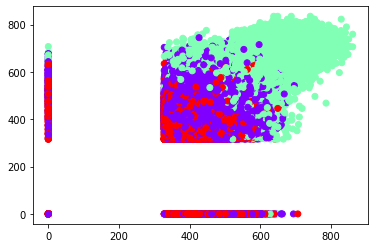

In [27]:
import matplotlib.pyplot as plt
colors = {0:'red', 1:'blue', 2:'green', 3: 'yellow', 4: 'pink', 5: 'orange', 6: 'purple'}
plt.scatter(X[:,0],X[:,1], c=model.labels_, cmap='rainbow')
plt.show()

<h1 style="color: red"> Analise dos cotovelos de cada ano

In [2]:
import pandas as pd
path = ['/home/joao/Desktop/Faculdade/IC/DataSets/microdados_enem_2019/DADOS/MICRODADOS_ENEM_2019.csv',
        '/home/joao/Desktop/Faculdade/IC/DataSets/microdados_enem2018/DADOS/MICRODADOS_ENEM_2018.csv',
        '/home/joao/Desktop/Faculdade/IC/DataSets/microdados_enem2017/Microdados Enem 2017/DADOS/MICRODADOS_ENEM_2017.csv',
        '/home/joao/Desktop/Faculdade/IC/DataSets/microdados_enem2016/Microdados_enem_2016/DADOS/microdados_enem_2016.csv',
        '/home/joao/Desktop/Faculdade/IC/DataSets/microdados_enem2015/DADOS/MICRODADOS_ENEM_2015.csv'
]
df = []
NOTAS = ['NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_CN', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']
for i in range(5):
    if(i != 4):
        df.append(pd.read_csv(path[i], sep = ';', usecols = NOTAS, encoding = 'ISO-8859-1'))
    else:
        df.append(pd.read_csv(path[i], sep = ',', usecols = NOTAS, encoding = 'ISO-8859-1'))

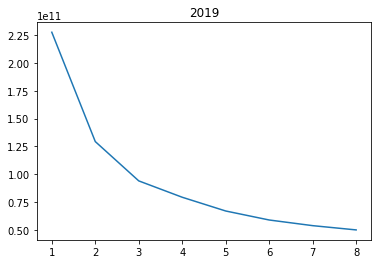

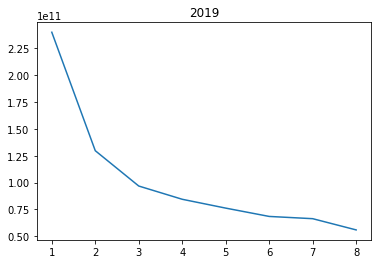

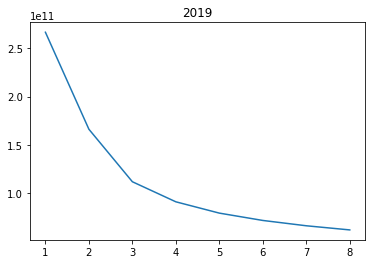

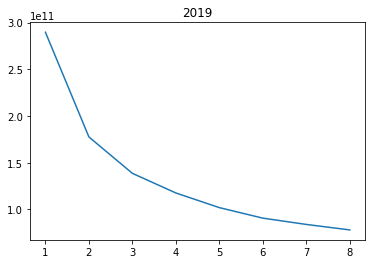

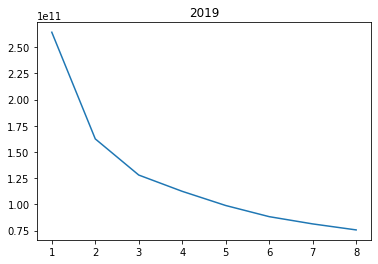

In [49]:
def clear_data(ds):
    ds = ds[ds['NU_NOTA_REDACAO'].notna()]
    ds = ds[ds['NU_NOTA_CH'].notna()] 
    ds = ds[ds['NU_NOTA_CN'].notna()]
    ds = ds[ds['NU_NOTA_LC'].notna()]
    ds = ds[ds['NU_NOTA_MT'].notna()]
    ##Ignorar alunos com 0
    return ds


counter = 0
for data in df:
    ds = clear_data(data)
    X = np.array(ds)
    total_errors = []
    f1 = []
    n = 8
    plt.clf()
    for i in range(n):
        model = Clustering(k = i +1)
        model.fit(X, True)
        total_errors.append(model.elbow)

    plt.xticks(np.arange(len(total_errors)), np.arange(1, len(total_errors)+1))
    plt.plot(total_errors)
    year = 2019 - counter
    plt.title(str(year))
    plt.show()

<h1 style = "color: red"> Analise do caso para o Déficit de Atencao

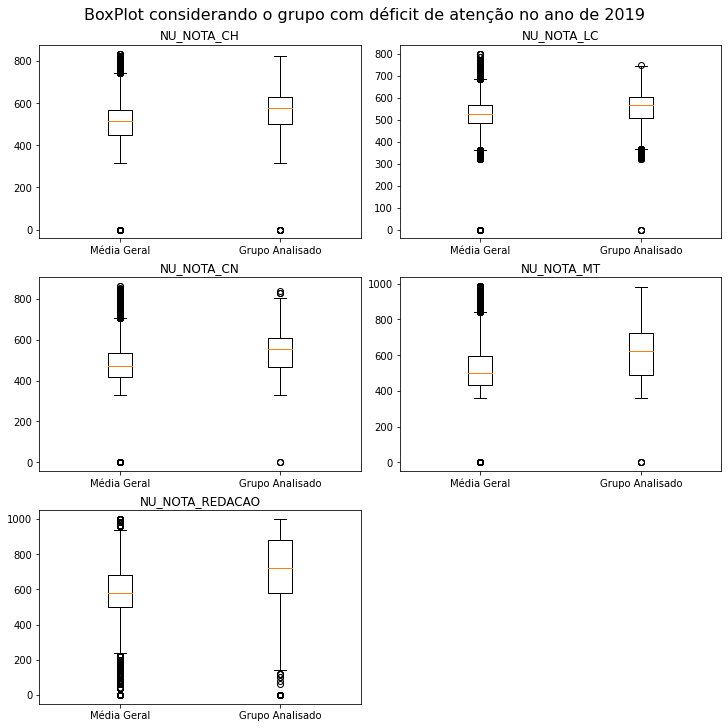

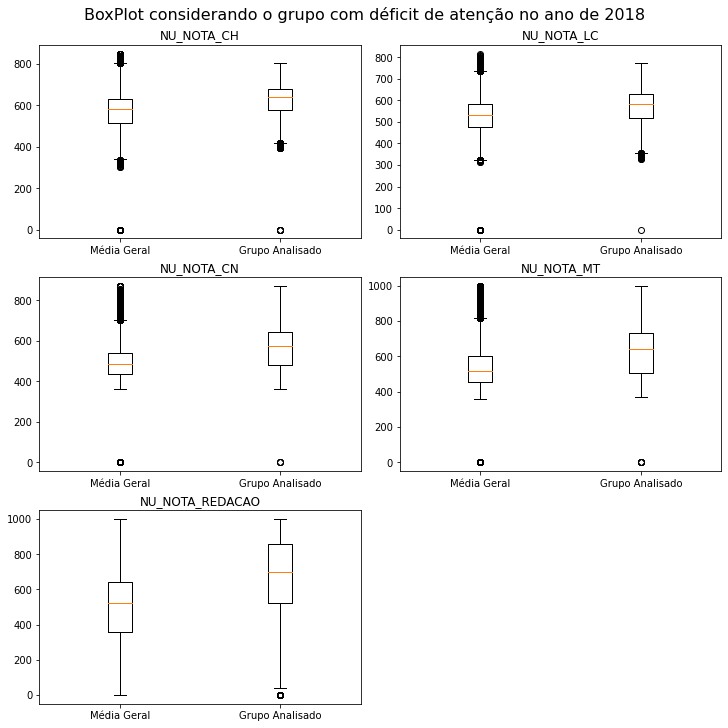

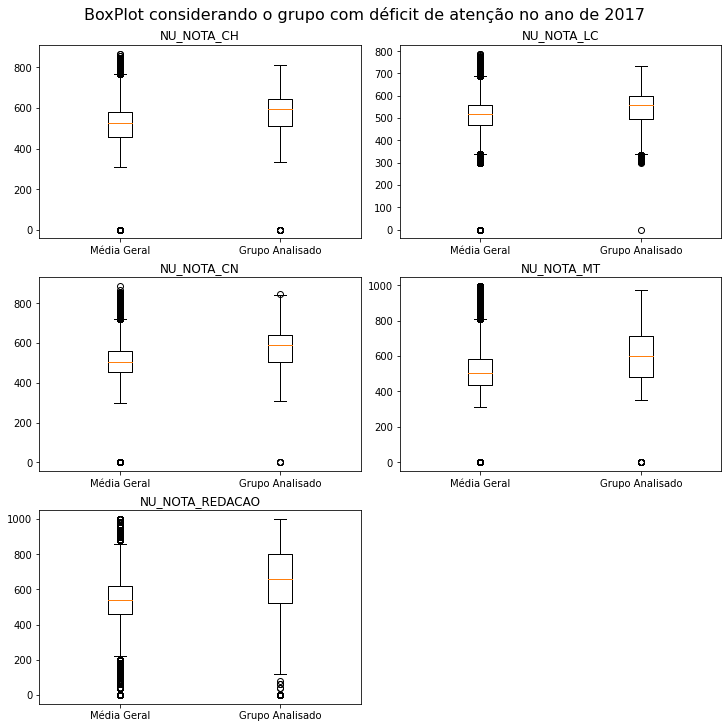

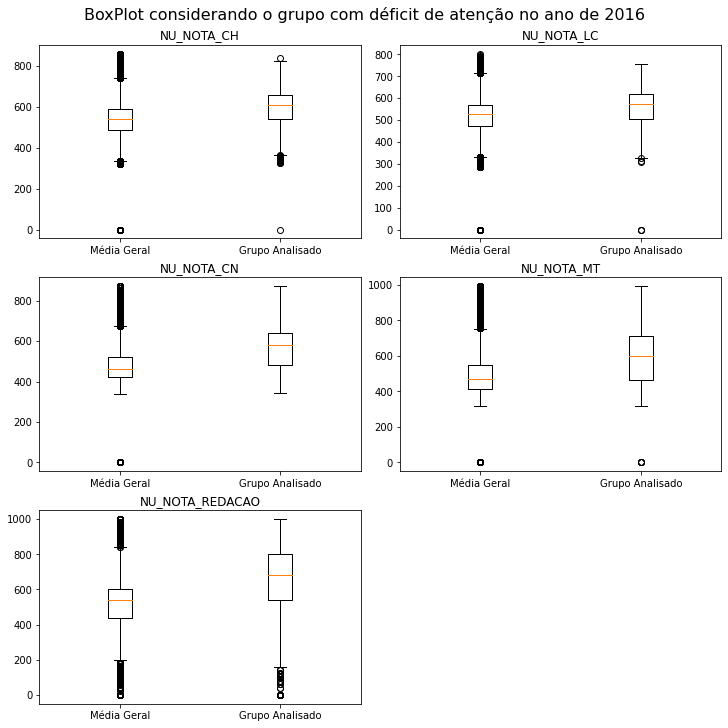

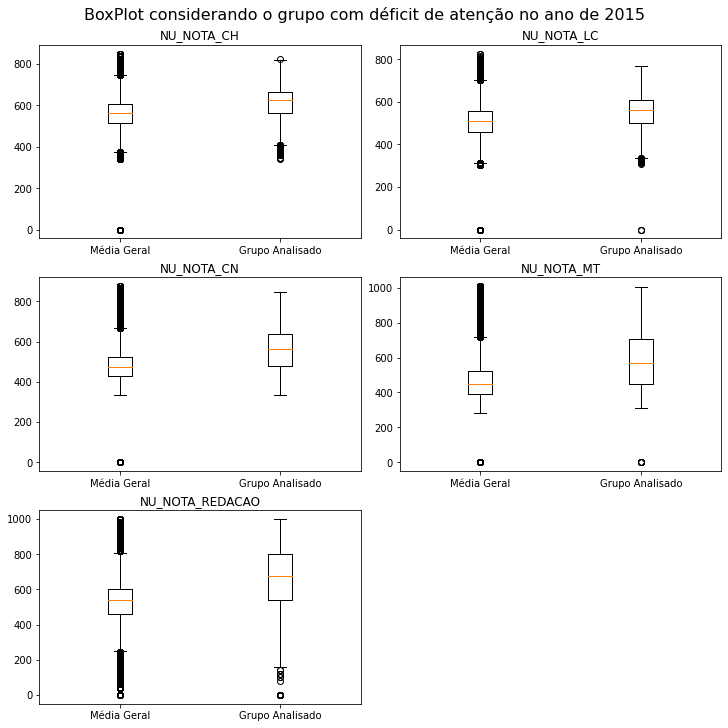

In [62]:
media_geral = []
media_grupo = []
ano = 2019
for data in df:
    
    data = clear_data(data)
    grupo = data[data['IN_DEFICIT_ATENCAO'] == 1]
    
    i=0
    j=0
    
    fig = plt.figure(constrained_layout=True, figsize=(10,10))
    fig.suptitle('BoxPlot considerando o grupo com déficit de atenção no ano de'  +' '+  str(ano), fontsize=16)
    
    for index,nota in enumerate(NOTAS):
        box = [data[nota], grupo[nota]]
        ax = plt.subplot(3, 2, index + 1)
        ax.boxplot(box)
        ax.set_title(nota)
        ax.set_xticks([1,2], ['Média Geral', 'Grupo Analisado'])

    ano -= 1


In [43]:
def clear_data(ds):
    ds = ds[ds['NU_NOTA_REDACAO'].notna()]
    ds = ds[ds['NU_NOTA_CH'].notna()] 
    ds = ds[ds['NU_NOTA_CN'].notna()]
    ds = ds[ds['NU_NOTA_MT'].notna()]
    ds = ds[ds['NU_NOTA_LC'].notna()]
    return ds

k = 3
ano = 2019
for data in df:
    ds = clear_data(data)
    X = np.array(ds[NOTAS])
    model = Clustering(k)
    model.fit(X)
    ds['K-classe'] = model.labels_
    print(ano)
    grupo = ds[ds['IN_DEFICIT_ATENCAO'] == 1].groupby('K-classe')
    print(grupo.mean())
    print(ds.groupby('K-classe').mean())
    print('--------------------------------------------------')
    ano -= 1
    #A ANALISE DE MAIOR DIFICULDADE SERIA MELHOR ANALISADA NÃO PELA MÉDIA COMUM, MAS SIM PELA MÉDIA NORMALIZADA..

2019
          IN_DEFICIT_ATENCAO  NU_NOTA_CN  NU_NOTA_CH  NU_NOTA_LC  NU_NOTA_MT  \
K-classe                                                                       
0                        1.0  466.215331  491.563905  504.791124  485.373265   
1                        1.0  593.562758  615.698738  591.429624  696.627237   
2                        1.0  422.105432  429.330494  441.310864  446.399383   

          NU_NOTA_REDACAO  
K-classe                   
0              584.927380  
1              826.245984  
2              245.827160  
          IN_DEFICIT_ATENCAO  NU_NOTA_CN  NU_NOTA_CH  NU_NOTA_LC  NU_NOTA_MT  \
K-classe                                                                       
0                   0.000906  452.681914  488.000786  509.676948  481.125989   
1                   0.004073  555.351866  589.226805  579.342272  642.845321   
2                   0.001399  424.094068  440.911805  462.277714  451.204659   

          NU_NOTA_REDACAO  
K-classe                 

In [47]:
#EXCLUIR ALUNOS COM 0 - exceto redação
#NORMALIZAR AS NOTAS - incluir redação
#KMeans - todos os anos (elbow)
#Grupos = soma das médias em todas as provas

#Criação de ID's -> alto desempenho, médio, baixo..

<h1> Normalizado, sem alunos com 0

In [43]:
import numpy as np
from sklearn import preprocessing
def clear_data(ds):
    ds = ds[ds['NU_NOTA_REDACAO'].notna()]
    ds = ds[ds['NU_NOTA_CH'].notna() & ds['NU_NOTA_CH'] != 0] 
    ds = ds[ds['NU_NOTA_CN'].notna() & ds['NU_NOTA_CN'] != 0]
    ds = ds[ds['NU_NOTA_MT'].notna() & ds['NU_NOTA_MT'] != 0]
    ds = ds[ds['NU_NOTA_LC'].notna() & ds['NU_NOTA_LC'] != 0]
    return ds

k = 3
ano = 2019
desempenho = ['BAIXO', 'MEDIO', 'ALTO']
for data in df:
    ds = clear_data(data)
    X = np.array(ds[NOTAS])
    X = preprocessing.minmax_scale(X, feature_range=(0, 1), axis=0, copy=True)
    model = Clustering(k)
    model.fit(X)
    ds['K-classe'] = model.labels_
    print(ano)
    grupo = ds[ds['IN_DEFICIT_ATENCAO'] == 1].groupby('K-classe')
    print(grupo.mean())
    print(ds.groupby('K-classe').mean())
    print('--------------------------------------------------')
    ano -= 1

2019
          IN_DEFICIT_ATENCAO  NU_NOTA_CN  NU_NOTA_CH  NU_NOTA_LC  NU_NOTA_MT  \
K-classe                                                                       
0                        1.0  602.545667  623.586461  597.081713  712.359106   
1                        1.0  416.311550  428.258511  443.058359  440.711854   
2                        1.0  491.682819  522.776937  529.490507  511.912580   

          NU_NOTA_REDACAO  
K-classe                   
0              829.148455  
1              374.513678  
2              634.909726  
          IN_DEFICIT_ATENCAO  NU_NOTA_CN  NU_NOTA_CH  NU_NOTA_LC  NU_NOTA_MT  \
K-classe                                                                       
0                   0.004577  571.643251  602.807104  588.230928  668.998150   
1                   0.001055  417.235439  433.155143  462.933571  444.439865   
2                   0.001086  474.359916  520.156322  533.548231  505.389818   

          NU_NOTA_REDACAO  
K-classe                 

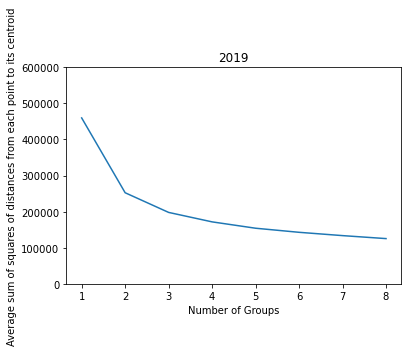

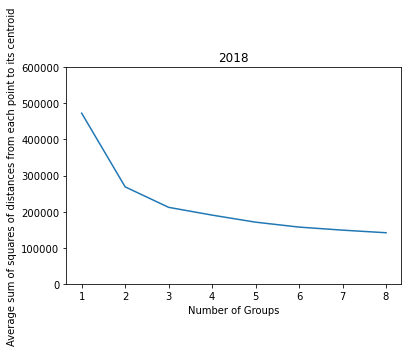

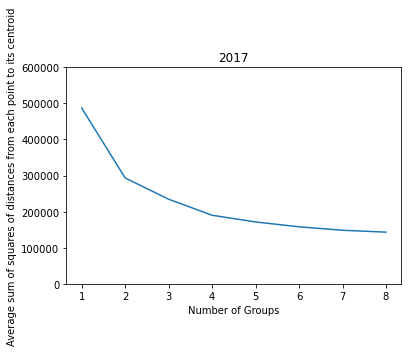

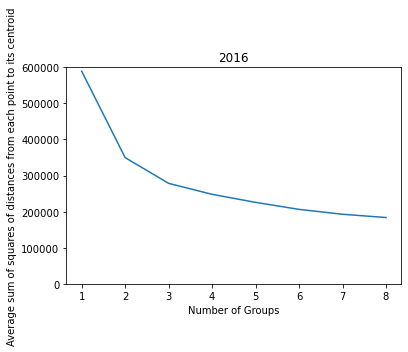

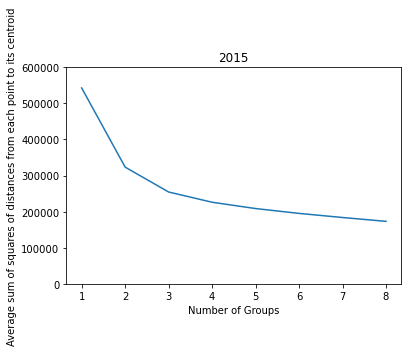

In [3]:
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
def clear_data(ds):
    ds = ds[ds['NU_NOTA_REDACAO'].notna()]
    ds = ds[ds['NU_NOTA_CH'].notna() & ds['NU_NOTA_CH'] != 0] 
    ds = ds[ds['NU_NOTA_CN'].notna() & ds['NU_NOTA_CN'] != 0]
    ds = ds[ds['NU_NOTA_MT'].notna() & ds['NU_NOTA_MT'] != 0]
    ds = ds[ds['NU_NOTA_LC'].notna() & ds['NU_NOTA_LC'] != 0]
    return ds

counter = 0
for data in df:
    ds = clear_data(data)
    X = np.array(ds[NOTAS])
    X = preprocessing.minmax_scale(X, feature_range=(0, 1), axis=0, copy=True)
    total_errors = []
    f1 = []
    n = 8
    plt.clf()
    for i in range(n):
        meanElb = []
        model = Clustering(k = i +1)
        model.fit(X)
        total_errors.append(model.elbow)

    plt.xticks(np.arange(len(total_errors)), np.arange(1, len(total_errors)+1))
    plt.plot(total_errors)
    year = 2019 - counter
    plt.xlabel("Number of Groups")
    plt.ylabel("Average sum of squares of distances from each point to its centroid")
    plt.title(str(year))
    plt.ylim(0, 600000)
    plt.show()
    counter += 1

In [44]:

original = np.array(grupo[NOTAS].mean().sum(axis = 1))

In [75]:
mean = np.sort(original)
print(original)
print(mean)


[3316.03813886 2645.8954343  2145.55281457]
[2145.55281457 2645.8954343  3316.03813886]


In [64]:
for i in range(len(mean)):
    kValue = list(original).index(mean[i])
    kIndex = ds.index[ds['K-classe'] == kValue]
    ds.loc[kIndex, ["Desempenho"]] = desempenho[i]

In [74]:
print("Agrupamento Semantico")
print(ds.groupby('Desempenho').mean())
print()
print('Agrupamento Algoritmo')
print(ds.groupby('K-classe').mean())

Agrupamento Semantico
            IN_DEFICIT_ATENCAO  NU_NOTA_CN  NU_NOTA_CH  NU_NOTA_LC  \
Desempenho                                                           
ALTO                  0.002018  577.430490  643.238183  589.421094   
BAIXO                 0.000303  430.932471  492.254791  438.561737   
MEDIO                 0.000349  478.307886  577.820507  524.749636   

            NU_NOTA_MT  NU_NOTA_REDACAO  K-classe  
Desempenho                                         
ALTO        628.103694       676.586953       0.0  
BAIXO       404.626875       432.849247       2.0  
MEDIO       454.363730       557.756357       1.0  

Agrupamento Algoritmo
          IN_DEFICIT_ATENCAO  NU_NOTA_CN  NU_NOTA_CH  NU_NOTA_LC  NU_NOTA_MT  \
K-classe                                                                       
0                   0.002018  577.430490  643.238183  589.421094  628.103694   
1                   0.000349  478.307886  577.820507  524.749636  454.363730   
2                   0.00

In [ ]:
#Rodar varias vezes o kmeans para o elbow
#Analisar porcentagem de deficiencias em cada um dos grupos - alto, medio e baixo
#Analisar porcentagem posterior para cada deficiencia
#Tabela com joinha!

<h1> Setting the semantics values of each group in the dataset

In [2]:
def clear_data(ds):
    cant_zero = ['NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_CN', 'NU_NOTA_MT']
    for nota in cant_zero:
        ds = ds[ds[nota] != 0]
    return ds

In [22]:
import numpy as np
from sklearn import preprocessing
from sklearn.cluster import KMeans
NOTAS = ['NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_CN', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']
COLUMNS = [
'NU_INSCRICAO',
'IN_BAIXA_VISAO',
'IN_CEGUEIRA',
'IN_SURDEZ',
'IN_DEFICIENCIA_AUDITIVA',
'IN_SURDO_CEGUEIRA',
'IN_DEFICIENCIA_FISICA',
'IN_DEFICIENCIA_MENTAL',
'IN_DEFICIT_ATENCAO',
'IN_DISLEXIA',
'IN_DISCALCULIA',
'IN_AUTISMO',
'TP_ESCOLA',
'SG_UF_RESIDENCIA',
'NU_NOTA_CN',
'NU_NOTA_CH',
'NU_NOTA_LC',
'NU_NOTA_MT',
'TP_STATUS_REDACAO',
'NU_NOTA_COMP1',
'NU_NOTA_COMP2',
'NU_NOTA_COMP3',
'NU_NOTA_COMP4',
'NU_NOTA_COMP5',
'NU_NOTA_REDACAO'
]
DESEMPENHO = ['BAIXO', 'MEDIO', 'ALTO']
COMPARED = ['NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_CN', 'NU_NOTA_MT', 'NU_NOTA_REDACAO', 'K-classe']
import pandas as pd
path = ['/home/joao/Desktop/Faculdade/IC/DataSets/microdados_enem_2019/DADOS/MICRODADOS_ENEM_2019.csv',
        '/home/joao/Desktop/Faculdade/IC/DataSets/microdados_enem2018/DADOS/MICRODADOS_ENEM_2018.csv',
        '/home/joao/Desktop/Faculdade/IC/DataSets/microdados_enem2017/Microdados Enem 2017/DADOS/MICRODADOS_ENEM_2017.csv',
        '/home/joao/Desktop/Faculdade/IC/DataSets/microdados_enem2016/Microdados_enem_2016/DADOS/microdados_enem_2016.csv',
        '/home/joao/Desktop/Faculdade/IC/DataSets/microdados_enem2015/DADOS/MICRODADOS_ENEM_2015.csv'
]
ano = 2019
k = 3
for i in range(5):
    if(i != 4):
        ds = (pd.read_csv(path[i], sep = ';', usecols = COLUMNS, encoding = 'ISO-8859-1'))
    else:
        ds = (pd.read_csv(path[i], sep = ',', usecols = COLUMNS, encoding = 'ISO-8859-1'))
    ds.dropna(inplace = True, subset = NOTAS)
    ds = clear_data(ds)
    X = np.array(ds[NOTAS])
    X = preprocessing.minmax_scale(X, feature_range=(0, 1), axis=0, copy=True)
    model = Clustering(3)
    model.fit(X)
    ds['K-classe'] = model.labels_
    #Aqui da pra aplicar um .apply map e conseguir um vetor de alto medio e baixo, refaço varias vezes o passo e uso um transpose e mode
    
    grupo = ds[COMPARED].groupby('K-classe')
    original = np.array(grupo[NOTAS].mean().sum(axis = 1))
    mean = np.sort(original)
    for j in range(len(mean)):
        kValue = list(original).index(mean[j])
        kIndex = ds.index[ds['K-classe'] == kValue]
        ds.loc[kIndex, ["Desempenho"]] = DESEMPENHO[j]
    
    ds.to_csv(str(ano), index = False)
    ano -= 1

In [23]:
grupo = ds.groupby('Desempenho')

In [24]:
grupo[NOTAS].mean()

,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_CN,NU_NOTA_MT,NU_NOTA_REDACAO
Desempenho,,,,,
ALTO,643.991773,590.103921,578.815465,630.740829,678.147814
BAIXO,493.313338,439.592258,431.265851,404.907487,434.457537
MEDIO,578.935248,525.917518,479.431942,455.893789,559.406758


In [13]:
zeroCN = df[df['NU_NOTA_CN'] != 0]

In [14]:
print(zeroCN)

         NU_INSCRICAO  NU_ANO  CO_MUNICIPIO_RESIDENCIA  \
0        190001595656    2019                  3552205   
1        190001421546    2019                  2910800   
2        190001133210    2019                  2304400   
3        190001199383    2019                  1721000   
4        190001237802    2019                  3118601   
...               ...     ...                      ...   
5095265  190006074437    2019                  5300108   
5095266  190005429225    2019                  1302603   
5095267  190006087652    2019                  4302105   
5095268  190006087653    2019                  4302105   
5095269  190006087654    2019                  4302105   

        NO_MUNICIPIO_RESIDENCIA  CO_UF_RESIDENCIA SG_UF_RESIDENCIA  NU_IDADE  \
0                      Sorocaba                35               SP      36.0   
1              Feira de Santana                29               BA      23.0   
2                     Fortaleza                23              